# Segmentação em Processamento Digital de Imagens

A segmentação é um processo onde a imagem é dividida em partes ou regiões significativas para facilitar a análise e a interpretação. O objetivo principal é isolar áreas de interesse como objetos, formas ou padrões específicos do restante da imagem, para que possam ser processadas ou analisadas separadamente. Foi utilizado Numpy, Scipy e OpenCV

## Descrição

Existem vários métodos para segmentar uma imagem, dependendo do problema e das características da imagem

- **Baseada em Limiares (Thresholding)**

    Um limiar é aplicado à imagem para separar pixels em diferentes classes com base na intensidade, por exemplo para separar pixels mais brilhantes (objetos) de pixels mais escuros (fundo). Funciona transformando em uma imagem binária baseando se o valor de determinado pixel é menor ou maior/igual ao valor/limiar/threshold definido. 

    ```python
    def threshold(imagem, limiar):
        copia = imagem.copy()
        # 1 𝑠𝑒 | 𝑅 𝑥, 𝑦 ≥ 𝑇
        # 0 𝑐𝑎𝑠𝑜 𝑜 𝑐𝑜𝑛𝑡𝑟á𝑟𝑖o
        for i in range(copia.shape[0]):
            for j in range(copia.shape[1]):
                if copia[i][j] >= limiar:
                    copia[i][j] = 1
                else:
                    copia[i][j] = 0
        return copia

    def limiarizacao(imagem, limiar):
        copia = imagem.copy()
        # 255 𝑠𝑒 | 𝑅 𝑥, 𝑦 ≥ 𝑇
        # 0 𝑐𝑎𝑠𝑜 𝑜 𝑐𝑜𝑛𝑡𝑟á𝑟𝑖o
        for i in range(copia.shape[0]):
            for j in range(copia.shape[1]):
                if copia[i][j] >= limiar:
                    copia[i][j] = 255
                else:
                    copia[i][j] = 0
        return copia
    ```

- **Baseada em Bordas**

    - **Canny**

        O algoritmo de Canny detecta bordas em uma imagem, ou seja, identifica áreas onde ocorrem mudanças abruptas na intensidade de pixel, o que pode frequentemente indicar transições entre objetos ou regiões. O algoritmo faz o cálculo do gradiente da imagem que então aplica **supressão Não Máxima (Non-Maximum Suppression)**, que faz com que apenas os pixels com magnitude máxima na direção do gradiente são mantidos. Pixels que não correspondem ao máximo local em uma direção são descartados. Para aplicar o Canny é recomendado aplicar um borramento antes assim reduzindo ruídos e maximizando a capacidade de detectar bordas do algoritmo.

        ```python
        def canny(imagem, limiar, limiar2):
            return cv2.Canny(imagem, limiar, limiar2)
        ```

    - **Laplaciano**

        Baseia-se no cálculo da segunda derivada da imagem, utilizando o operador Laplaciano (∇²). Consegue realçar regiões onde a intensidade muda rapidamente, como bordas em todas as direções ao mesmo tempo, porém sensível a ruídos.

    - **Prewitt**

        Utiliza máscaras/kernels simples para calcular a primeira derivada em direções horizontais e verticais. É um método simples que detecta bordas considerando a intensidade em 𝑥 e 𝑦. Porém menos preciso do que métodos como o Sobel.

    - **Sobel**

        Semelhante ao **Prewitt**, porém dá mais peso às intensidades próximas ao pixel central. Simples, mas possui melhor detecção de bordas suaves e menos sensível a ruídos que **Prewitt**. 

    - **Marr-Hildreth**

        Combinação da suavização Gaussiana com o operador Laplaciano **(LoG - Laplacian of Gaussian)**. Primeiro aplica uma suavização para redução de ruídos **->** Aplica o Laplaciano para detectar bordas e **->** Zero-crossings do **LoG** são usados para identificar as bordas. Pode ser sensível a mudanças na escala e possui maior custo computacional.

- **Comparação**

    | Método          | Base Matemática  | Direções               | Ruído            | Complexidade |
    |-----------------|------------------|------------------------|------------------|--------------|
    | Laplaciano      | Segunda derivada | Todas                  | Alta sensibilidade | Média        |
    | Prewitt         | Primeira derivada| Horizontal e Vertical  | Média            | Baixa        |
    | Sobel           | Primeira derivada| Horizontal e Vertical  | Menos sensível   | Média        |
    | Marr-Hildreth   | LoG              | Todas                  | Suavizado        | Alta         |


### Código final

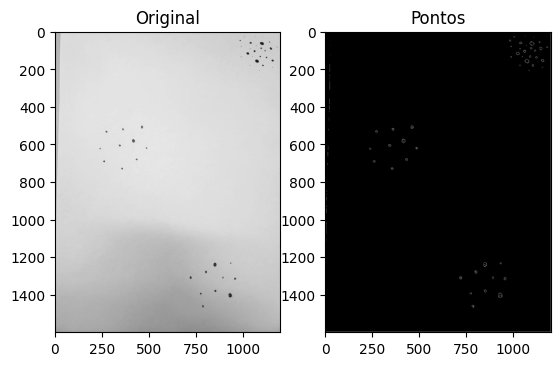

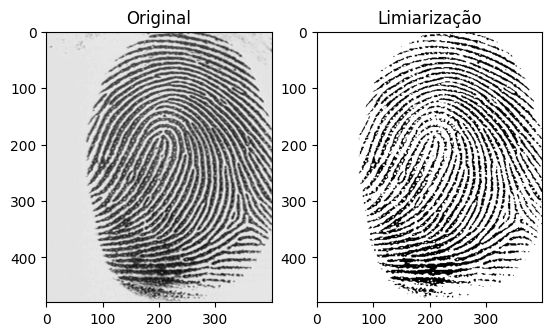

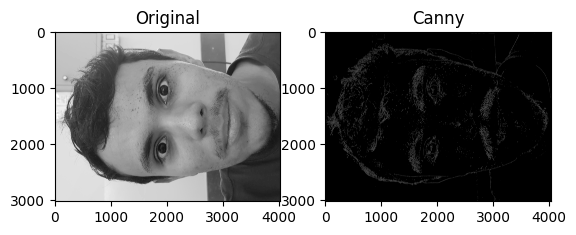

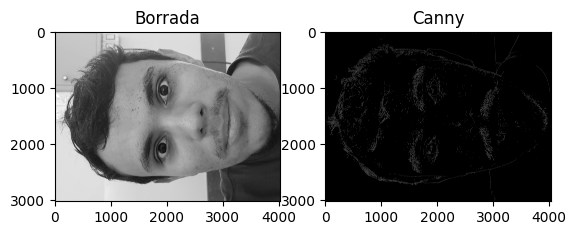

In [2]:
import datetime
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2

def plot(img, edit, txt1, txt2):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(txt1)
    ax[1].imshow(edit, cmap='gray')
    ax[1].set_title(txt2)
    plt.show()

def salvar(imagem, nome):
    print("Desenha salvar a imagem? (s/N)")
    entrada = input()
    if entrada == "s":
        time = datetime.datetime.now().strftime("%Y-%m-%d")
        imagem.save(f'imgs/{nome}{time}.png')

def convolucao(imagem, kernel):
    return scipy.signal.convolve2d(imagem, kernel, mode='same')

def threshold(imagem, limiar):
    copia = imagem.copy()
    # 1 𝑠𝑒 | 𝑅 𝑥, 𝑦 ≥ 𝑇
    # 0 𝑐𝑎𝑠𝑜 𝑜 𝑐𝑜𝑛𝑡𝑟á𝑟𝑖o
    for i in range(copia.shape[0]):
        for j in range(copia.shape[1]):
            if copia[i][j] >= limiar:
                copia[i][j] = 1
            else:
                copia[i][j] = 0
    return copia

def limiarizacao(imagem, limiar):
    copia = imagem.copy()
    for i in range(copia.shape[0]):
        for j in range(copia.shape[1]):
            if copia[i][j] >= limiar:
                copia[i][j] = 255
            else:
                copia[i][j] = 0
    return copia

def canny(imagem, limiar, limiar2):
    return cv2.Canny(imagem, limiar, limiar2)

def um(img):
    # dectecção de pontos
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    img = img.convert('L')
    img = np.array(img)

    edit = convolucao(img, kernel)
    edit = threshold(edit, 100)

    plot(img, edit, "Original", "Pontos")

def dois(img):
    # limiarização
    img = img.convert('L')
    img = np.array(img)
    edit = limiarizacao(img, 100)
    plot(img, edit, "Original", "Limiarização")

def tres(img, limiar, limiar2):
    # Detector de bordas Canny
    img = img.convert('L')
    img = np.array(img)
    edit = canny(img, limiar, limiar2)
    plot(img, edit, "Original", "Canny")

    borrada = cv2.GaussianBlur(img, (5, 5), 0)
    edit = canny(borrada, limiar, limiar2)
    plot(borrada, edit, "Borrada", "Canny")

def main():
    pontos = Image.open('imgs/pontos.jpeg')
    impressao = Image.open('imgs/impressao.tif')
    emanuel = Image.open('imgs/emanuel.jpg')

    um(pontos)

    dois(impressao)

    tres(emanuel, 60, 70)

if __name__ == "__main__":
    main()
